<a href="https://colab.research.google.com/github/spencer-g15/Data_Sci/blob/main/Gold_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [ ]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [ ]:
url = "https://docs.google.com/presentation/d/1Wk2D0N3q4i9sEonrJFKvKKN4yfBZXX-zOWSMkijoV48/edit#slide=id.p"

In [ ]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [ ]:
images.shape

torch.Size([50, 3, 224, 224])

In [ ]:
model(images)

tensor([[-2.9273, -0.7299, -3.8339,  ...,  1.7740,  6.3856,  4.5453],
        [-5.0190,  1.5979, -7.3455,  ...,  0.4795,  8.8061,  3.3506],
        [-0.8456,  1.1004, -2.6668,  ..., -1.6995,  5.7684,  2.9058],
        ...,
        [-1.1854,  2.9518, -8.7432,  ...,  2.2983,  9.8420,  2.4417],
        [-2.6938,  0.4106, -8.2477,  ...,  0.1917,  7.4307,  1.7897],
        [ 0.3382,  3.5791, -8.7956,  ...,  2.8573,  7.3004,  0.5518]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
y = model(images)

In [ ]:
y.shape

torch.Size([50, 1000])

In [ ]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [ ]:
for i in list(guesses):
    print(labels[i])

pizza, pizza pie
eggnog
hair slide
hair slide
hot pot, hotpot
plate
American lobster, Northern lobster, Maine lobster, Homarus americanus
waffle iron
carbonara
hamper
French loaf
pizza, pizza pie
carbonara
pretzel
hot pot, hotpot
eggnog
carbonara
hotdog, hot dog, red hot
spaghetti squash
microwave, microwave oven
corn
waffle iron
potpie
panpipe, pandean pipe, syrinx
fiddler crab
rotisserie
hen-of-the-woods, hen of the woods, Polyporus frondosus, Grifola frondosa
teddy, teddy bear
pizza, pizza pie
hot pot, hotpot
pomegranate
pizza, pizza pie
lotion
carbonara
corn
chambered nautilus, pearly nautilus, nautilus
hair slide
Christmas stocking
corn
hot pot, hotpot
plate
bagel, beigel
plate
hot pot, hotpot
reel
packet
hamper
spatula
Crock Pot
broccoli


In [ ]:
Y = np.zeros(50,)
Y[25:] = 1

In [ ]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
X = y.detach().cpu().numpy() 

In [ ]:
X.shape

(50, 1000)

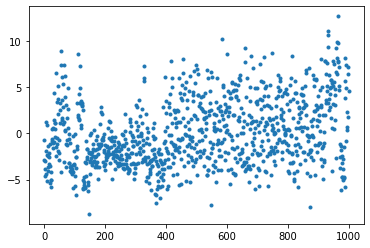

In [ ]:
plt.plot(X[0],'.')

In [ ]:
X[0]

array([-2.92734599e+00, -7.29853630e-01, -3.83390856e+00, -3.02406192e+00,
       -4.64587927e+00,  1.22924817e+00, -4.36825657e+00, -1.87914300e+00,
        8.85731101e-01, -5.09803581e+00, -2.38533354e+00, -3.68691826e+00,
       -1.38947701e+00, -2.46166277e+00, -4.03084755e+00, -3.35071087e+00,
       -2.14469695e+00, -2.58219075e+00, -3.47718096e+00, -1.10829067e+00,
       -5.34402180e+00, -5.05853653e+00, -5.80817509e+00, -4.13818502e+00,
       -5.03975248e+00,  4.37921882e-01, -5.86884677e-01, -8.57898295e-01,
       -1.08823419e+00, -1.58518386e+00,  5.35486579e-01, -9.59502101e-01,
        4.35793686e+00,  1.41623998e+00,  4.65495884e-01, -3.41385841e-01,
        1.13826013e+00,  1.06964445e+00,  6.48550415e+00, -1.43865085e+00,
       -2.41171980e+00, -5.27190924e-01,  3.35581779e+00, -1.16615725e+00,
        3.66960907e+00,  5.16478539e+00, -1.86862147e+00,  2.10954618e+00,
       -2.11217690e+00, -7.24829435e-01, -2.83970642e+00,  1.14083385e+00,
        3.27598333e+00,  

In [ ]:
np.argmax(X[0])

963

In [ ]:
labels[948]

'Granny Smith'

In [ ]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [ ]:
for i in top_ten:
    print(labels[i])

pizza, pizza pie
French loaf
pretzel
hair slide
dough
burrito
bagel, beigel
pomegranate
mitten
hognose snake, puff adder, sand viper


In [ ]:
labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([  7.,  70., 220., 251., 169., 132.,  94.,  44.,  10.,   3.]),
 array([-8.710212  , -6.5724545 , -4.4346976 , -2.2969403 , -0.15918331,
         1.9785738 ,  4.116331  ,  6.254088  ,  8.391845  , 10.529602  ,
        12.667359  ], dtype=float32),
 <a list of 10 Patch objects>)

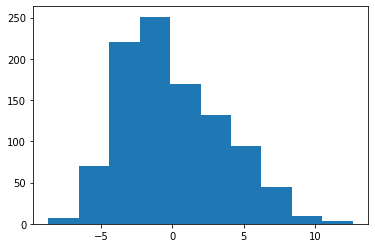

In [ ]:
plt.hist(X[0])

In [ ]:
X = GPU_data(X)
Y = GPU_data(Y)

In [ ]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [ ]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [ ]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape

torch.Size([50, 1000])

In [ ]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
def model(x,w):

    return x@w[0]

In [ ]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


AssertionError: ignored

https://tensorspace.org/